<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/arch_domain_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domain Frequency dataset

First we need to enter the URL for our Domain Frequency dataset. You can get this by right clicking the Download icon, and selecting "Copy Link".

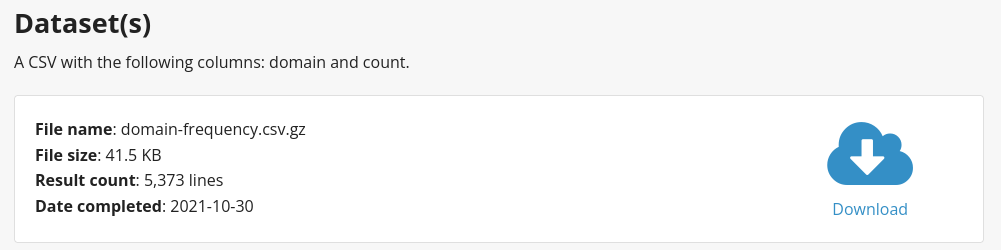

In [ ]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-06689/DomainFrequencyExtraction/domain-frequency.csv.gz?access=FUO54Y4B3J3GAZSDD6ML7DQENUN5BDOX' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-06689/DomainFrequencyExtraction/domain-frequency.csv.gz?access=FUO54Y4B3J3GAZSDD6ML7DQENUN5BDOX


# Environment

Next, we'll setup our environment so we can load our domain frequency dataset into [pandas](https://pandas.pydata.org), and use [Altair](https://altair-viz.github.io/) for plots. Altair is useful for creating plots since they can be easily exported as a PNG or SVG.

In [ ]:
import pandas as pd
import altair as alt

## Data Table Display

Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides!

Data table display for pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [ ]:
%load_ext google.colab.data_table

# Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [ ]:
domains = pd.read_csv(dataset, compression='gzip')
domains

,domain,count
0,sld.cu,11002591
1,cult.cu,5197445
2,facebook.com,1985543
3,icrt.cu,1936127
4,cubava.cu,967903
...,...,...
20402,yardbarker.com,1
20403,bufetetoro.com,1
20404,understandingwar.org,1
20405,headaches.org,1


# Create our first vizualization

What does the distribution of domains look like?

Here we can see which domains are the most frequent within the collection.

In [ ]:
top_domains = domains.sort_values("count", ascending=False).head(10)

top_domains_bar = (
    alt.Chart(top_domains)
    .mark_bar()
    .encode(
        x=alt.X("domain:O", title="Domain", sort="-y"),
        y=alt.Y("count:Q", title="Count, Mean of Count"),
    )
)

top_domains_rule = (
    alt.Chart(top_domains).mark_rule(color="red").encode(y="mean(count):Q")
)

top_domains_text = top_domains_bar.mark_text(align="center", baseline="bottom").encode(
    text="count:Q"
)

(top_domains_bar + top_domains_rule + top_domains_text).properties(
    width=1400, height=700, title="Domains Distribution"
)

alt.LayerChart(...)

## Top Level Domain Analysis

pandas allows you to create new columns in a DataFrame based off of existing data. This comes in handy for a number of use cases with the available data that we have. In this case, let's create a new column, `tld`, which is based off an existing column, 'domain'. This example should provide you with an implementation pattern for expanding on these datasets to do further research and analysis.

A [top-level domain](https://en.wikipedia.org/wiki/Top-level_domain) refers to the highest domain in an address - i.e. `.ca`, `.com`, `.org`, or yes, even `.pizza`.

Things get a bit complicated, however, in some national TLDs. While `qc.ca` (the domain for Quebec) isn't really a top-level domain, it has many of the features of one as people can directly register under it. Below, we'll use the command `suffix` to include this. 

> You can learn more about suffixes at https://publicsuffix.org.

We'll take the `domain` column and extract the `tld` from it with [`tldextract`](https://github.com/john-kurkowski/tldextract).

First we'll add the [`tldextract`](https://github.com/john-kurkowski/tldextract) library to the notebook. Then, we'll create the new column.

In [ ]:
%%capture

!pip install tldextract

In [ ]:
import tldextract

domains["tld"] = domains.apply(
    lambda row: tldextract.extract(row.domain).suffix, axis=1
)
domains

,domain,count,tld
0,sld.cu,11002591,cu
1,cult.cu,5197445,cu
2,facebook.com,1985543,com
3,icrt.cu,1936127,cu
4,cubava.cu,967903,cu
...,...,...,...
20402,yardbarker.com,1,com
20403,bufetetoro.com,1,com
20404,understandingwar.org,1,org
20405,headaches.org,1,org


In [ ]:
tld_count = domains["tld"].value_counts()
tld_count

com       9179
org       3192
net        783
es         609
cu         446
          ... 
mus.br       1
gov.hk       1
gov.pl       1
edu.mk       1
edu.my       1
Name: tld, Length: 484, dtype: int64

In [ ]:
tld_count = (
    domains["tld"]
    .value_counts()
    .rename_axis("TLD")
    .reset_index(name="Count")
    .head(10)
)

tld_bar = (
    alt.Chart(tld_count)
    .mark_bar()
    .encode(x=alt.X("TLD:O", sort="-y"), y=alt.Y("Count:Q"))
)

tld_rule = alt.Chart(tld_count).mark_rule(color="red").encode(y="mean(Count):Q")

tld_text = tld_bar.mark_text(align="center", baseline="bottom").encode(text="Count:Q")

(tld_bar + tld_rule + tld_text).properties(
    width=1400, height=700, title="Top Level Domain Distribution"
)

alt.LayerChart(...)